In [1]:
hbb = "MVHLTPEEKSAVTALWGKVNVDEVGGEALGRLLVVYPWTQRFFESFGDLSTPDAVMGNPKKAHGKKVLGAFSDGLAHLDNLKGTFATLSELHCDKLHVDPENFRLLGNVLVCVLAHHFGKEFTPPVQAAYQKVVAGVANALAHKYH"
pr39 = "METQRASLCLGRWSLWLLLLGLVVPSASAQALSYREAVLRAVDRLNEQSSEANLYRLLELDQPPKADEDPGTPKPVSFTVKETVCPRPTRQPPELCDFKENGRVKQCVGTVTLNPSIHSLDISCNEIQSVRRRPRPPYLPRPRPPPFFPPRLPPRIPPGFPPRFPPRFPGKR"

amino_acids = {'VAL':'V', 'ILE':'I', 'LEU':'L', 'GLU':'E', 'GLN':'Q', \
'ASP':'D', 'ASN':'N', 'HIS':'H', 'TRP':'W', 'PHE':'F', 'TYR':'Y',    \
'ARG':'R', 'LYS':'K', 'SER':'S', 'THR':'T', 'MET':'M', 'ALA':'A',    \
'GLY':'G', 'PRO':'P', 'CYS':'C'}

In [2]:
from disassembly.simulate_proteolysis import enzyme

protease_iv = enzyme({"K":1})
trypsin = enzyme({"K":0.5, "R":0.5})
elne = enzyme({"V":0.5, "I":0.25, "A":0.15, "T":0.1})
unspecific = enzyme({v: 1/len(amino_acids.values()) for k, v in amino_acids.items()})

In [3]:
from disassembly.simulate_proteolysis import cleave

nodes = cleave(hbb, trypsin, n_cleaves=100, n_starting_proteins=25)
new_d = {}
for k in sorted(nodes, key=len, reverse=True):
    new_d[k] = nodes[k]
nodes = new_d
nodes

{'LLVVYPWTQRFFESFGDLSTPDAVMGNPKKAHGKKVLGAFSDGLAHLDNLKGTFATLSELHCDKLHVDPENFRLLGNVLVCVLAHHFGKEFTPPVQAAYQKVVAGVANALAHKYH': 1,
 'MVHLTPEEKSAVTALWGKVNVDEVGGEALGRLLVVYPWTQRFFESFGDLSTPDAVMGNPKKAHGKKVLGAFSDGLAHLDNLKGTFATLSELHCDKLHVDPENFR': 1,
 'MVHLTPEEKSAVTALWGKVNVDEVGGEALGRLLVVYPWTQRFFESFGDLSTPDAVMGNPKKAHGKKVLGAFSDGLAHLDNLK': 1,
 'KVLGAFSDGLAHLDNLKGTFATLSELHCDKLHVDPENFRLLGNVLVCVLAHHFGKEFTPPVQAAYQKVVAGVANALAHKYH': 1,
 'VLGAFSDGLAHLDNLKGTFATLSELHCDKLHVDPENFRLLGNVLVCVLAHHFGKEFTPPVQAAYQKVVAGVANALAHKYH': 3,
 'VLGAFSDGLAHLDNLKGTFATLSELHCDKLHVDPENFRLLGNVLVCVLAHHFGKEFTPPVQAAYQKVVAGVANALAHK': 1,
 'SAVTALWGKVNVDEVGGEALGRLLVVYPWTQRFFESFGDLSTPDAVMGNPKKAHGKKVLGAFSDGLAHLDNLK': 2,
 'AHGKKVLGAFSDGLAHLDNLKGTFATLSELHCDKLHVDPENFRLLGNVLVCVLAHHFGKEFTPPVQAAYQK': 1,
 'KVLGAFSDGLAHLDNLKGTFATLSELHCDKLHVDPENFRLLGNVLVCVLAHHFGKEFTPPVQAAYQK': 1,
 'MVHLTPEEKSAVTALWGKVNVDEVGGEALGRLLVVYPWTQRFFESFGDLSTPDAVMGNPKKAHGKK': 3,
 'GTFATLSELHCDKLHVDPENFRLLGNVLVCVLAHHFGKEFTPPVQAAYQKVVAGVANALAHKYH': 3,
 'MVHLTPEEKSAVTALWGKVNVDEVGGEAL

In [7]:
from disassembly.disassembly import get_disassembly
t = get_disassembly(cleave(hbb, trypsin, n_cleaves=100, n_starting_proteins=25))
print("done")
e = get_disassembly(cleave(hbb, elne, n_cleaves=100, n_starting_proteins=25))
print("done")
p = get_disassembly(cleave(hbb, protease_iv, n_cleaves=100, n_starting_proteins=25))
print("done")
#u = get_disassembly(cleave(hbb, unspecific, n_cleaves=100, n_starting_proteins=25))

print(e,t,p)

done
done
done
2.0786818433358993 3.6656628992234266 3.7734156962607783


Text(0.5, 0, 'Protease')

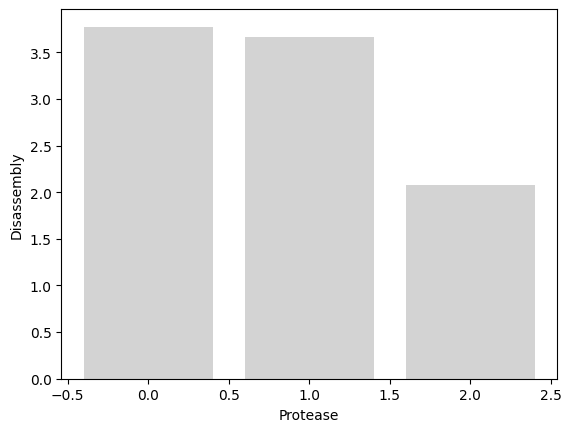

In [8]:
import matplotlib.pyplot as plt

plt.bar(x=[0,1,2], height=[p,t,e], color="lightgray")

plt.ylabel("Disassembly")
plt.xlabel("Protease")

In [9]:
from disassembly.disassembly import get_disassembly_indexes

nodes = cleave(hbb, trypsin, n_cleaves=100, n_starting_proteins=25)
new_d = {}
for k in sorted(nodes, key=len, reverse=True):
    new_d[k] = nodes[k]
nodes = new_d

d_i = get_disassembly_indexes(nodes)

(array([ 3.,  0.,  0.,  5.,  0.,  6.,  8., 13.,  9.,  9.]),
 array([0.        , 0.26560245, 0.53120491, 0.79680736, 1.06240981,
        1.32801227, 1.59361472, 1.85921717, 2.12481962, 2.39042208,
        2.65602453]),
 <BarContainer object of 10 artists>)

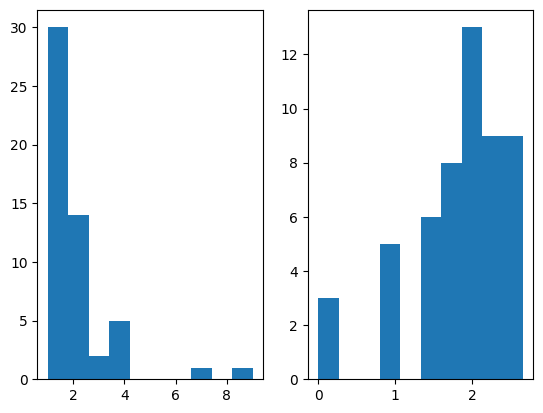

In [10]:
fig, axs = plt.subplots(1,2)

axs[0].hist(x=nodes.values())
axs[1].hist(x=d_i.values())

In [11]:
nodes = cleave(hbb, elne, n_cleaves=100, n_starting_proteins=25)
new_d = {}
for k in sorted(nodes, key=len, reverse=True):
    new_d[k] = nodes[k]
nodes = new_d


d_i = get_disassembly_indexes(nodes)

(array([ 1.,  0.,  3.,  0.,  6.,  4., 19., 18., 25.,  3.]),
 array([0.        , 0.33854991, 0.67709982, 1.01564974, 1.35419965,
        1.69274956, 2.03129947, 2.36984938, 2.7083993 , 3.04694921,
        3.38549912]),
 <BarContainer object of 10 artists>)

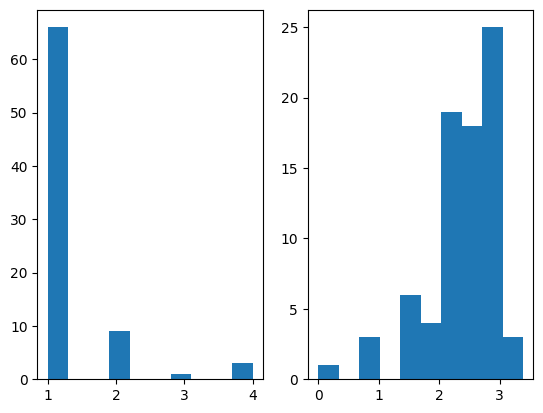

In [12]:
fig, axs = plt.subplots(1,2)

axs[0].hist(x=nodes.values())
axs[1].hist(x=d_i.values())